In [2]:
# Import the pandas library, our primary tool for data manipulation
import pandas as pd

# Load the logon dataset from our data folder
# We're parsing the 'date' column as a datetime object right away
logon_df = pd.read_csv('data/logon.csv', parse_dates=['date'])

# Display the first 5 rows of the dataset to see what it looks like
print("Logon data loaded successfully!")
logon_df.head()

Logon data loaded successfully!


,id,date,user,pc,activity
0,{X1D9-S0ES98JV-5357PWMI},2010-01-02 06:49:00,NGF0157,PC-6056,Logon
1,{G2B3-L6EJ61GT-2222RKSO},2010-01-02 06:50:00,LRR0148,PC-4275,Logon
2,{U6Q3-U0WE70UA-3770UREL},2010-01-02 06:53:04,LRR0148,PC-4124,Logon
3,{I0N5-R7NA26TG-6263KNGM},2010-01-02 07:00:00,IRM0931,PC-7188,Logon
4,{D1S0-N6FH62BT-5398KANK},2010-01-02 07:00:00,MOH0273,PC-6699,Logon


In [3]:
try:
    device_df = pd.read_csv('data/device.csv', parse_dates=['date'])
    file_df = pd.read_csv('data/file.csv', parse_dates=['date'])

    print("All datasets loaded successfully!")
    
    print("\n--- Device Data (First 5 Rows) ---")
    display(device_df.head())
    
    print("\n--- File Data (First 5 Rows) ---")
    display(file_df.head())

    # Get a summary of the file_df to see data types and non-null counts
    print("\n--- File Data Info ---")
    file_df.info()

except FileNotFoundError:
    print("ERROR: Make sure logon.csv, device.csv, and file.csv are in your 'data' folder!")

All datasets loaded successfully!

--- Device Data (First 5 Rows) ---


,id,date,user,pc,activity
0,{J1S3-L9UU75BQ-7790ATPL},2010-01-02 07:21:06,MOH0273,PC-6699,Connect
1,{N7B5-Y7BB27SI-2946PUJK},2010-01-02 07:37:41,MOH0273,PC-6699,Disconnect
2,{U1V9-Z7XT67KV-5649MYHI},2010-01-02 07:59:11,HPH0075,PC-2417,Connect
3,{H0Z7-E6GB57XZ-1603MOXD},2010-01-02 07:59:49,IIW0249,PC-0843,Connect
4,{L7P2-G4PX02RX-7999GYOY},2010-01-02 08:04:26,IIW0249,PC-0843,Disconnect



--- File Data (First 5 Rows) ---


,id,date,user,pc,filename,content
0,{L9G8-J9QE34VM-2834VDPB},2010-01-02 07:23:14,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 during difficulty over...
1,{H0W6-L4FG38XG-9897XTEN},2010-01-02 07:26:19,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters 25 landed strait dis...
2,{M3Z0-O2KK89OX-5716MBIM},2010-01-02 08:12:03,HPH0075,PC-2417,D3D3WC9W.doc,D0-CF-11-E0-A1-B1-1A-E1 union 24 declined impo...
3,{E1I4-S4QS61TG-3652YHKR},2010-01-02 08:17:00,HPH0075,PC-2417,QCSW62YS.doc,D0-CF-11-E0-A1-B1-1A-E1 becoming period begin ...
4,{D4R7-E7JL45UX-0067XALT},2010-01-02 08:24:57,HSB0196,PC-8001,AU75JV6U.jpg,FF-D8



--- File Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445581 entries, 0 to 445580
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        445581 non-null  object        
 1   date      445581 non-null  datetime64[ns]
 2   user      445581 non-null  object        
 3   pc        445581 non-null  object        
 4   filename  445581 non-null  object        
 5   content   445581 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 20.4+ MB


In [4]:
# --- Data Preparation for Visualization ---

# We only care about 'Logon' activities for this analysis, not 'Logoff'
logons_only_df = logon_df[logon_df['activity'] == 'Logon'].copy()

# Extract the hour of the day (0-23) and the day of the week (0=Monday, 6=Sunday)
logons_only_df['hour'] = logons_only_df['date'].dt.hour
logons_only_df['day_of_week'] = logons_only_df['date'].dt.dayofweek

# Display the new columns to verify they were created correctly
logons_only_df[['date', 'hour', 'day_of_week']].head()

,date,hour,day_of_week
0,2010-01-02 06:49:00,6,5
1,2010-01-02 06:50:00,6,5
2,2010-01-02 06:53:04,6,5
3,2010-01-02 07:00:00,7,5
4,2010-01-02 07:00:00,7,5


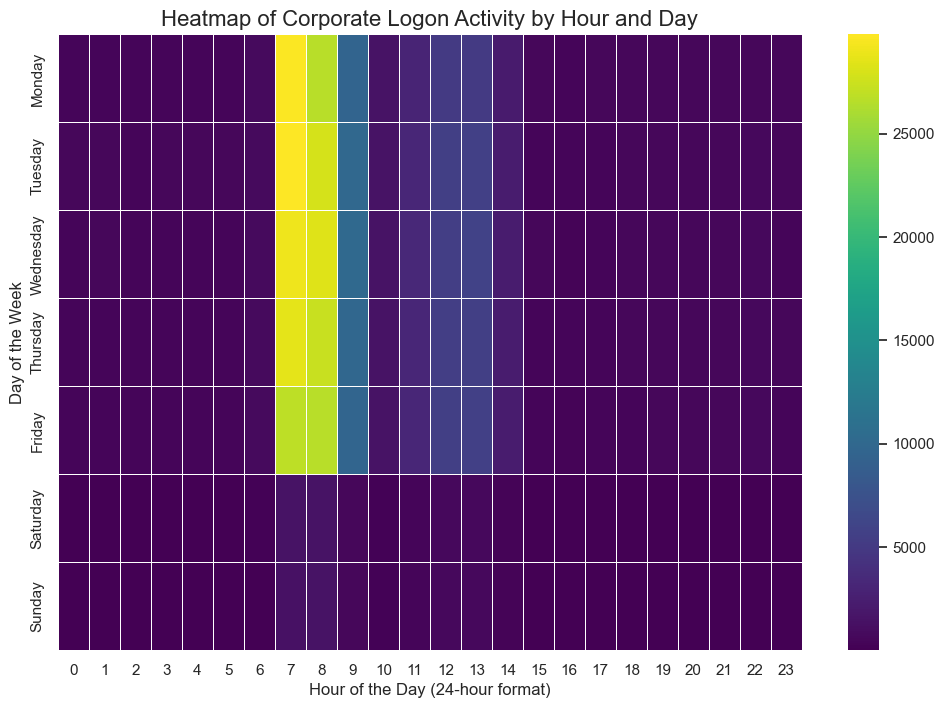

In [5]:
# --- Import Visualization Libraries ---
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for our plots
sns.set_theme(style="whitegrid")

# --- Create the Heatmap ---

# Group the data by day and hour, and count the number of logons in each slot
logon_counts = logons_only_df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# The day_of_week is currently a number (0-6). Let's make it human-readable.
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
logon_counts.index = [day_names[i] for i in logon_counts.index]

# Create the plot
plt.figure(figsize=(12, 8)) # Set the size of the figure
heatmap = sns.heatmap(logon_counts, cmap='viridis', linewidths=.5)

# Add titles and labels for clarity
plt.title('Heatmap of Corporate Logon Activity by Hour and Day', fontsize=16)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)

# Display the plot
plt.show()

In [6]:
# --- Find a User of Interest ---

# The file_df dataframe contains a log of every time a file was copied to a device.
# Let's count how many times each user appears in this log.
top_file_users = file_df['user'].value_counts().head(10)

# Create a clear title for our output
print("--- Top 10 Users by Number of File Copies to Removable Drives ---")

# Display the result
print(top_file_users)

--- Top 10 Users by Number of File Copies to Removable Drives ---
user
HSB0196    11627
AJF0370    11053
LBH0942    10889
DLM0051    10673
HPH0075     9323
MOH0273     9306
DBB0384     8543
ZKS0899     8537
THR0873     8525
VIA0063     8524
Name: count, dtype: int64


In [7]:
suspect_user_id = 'HSB0196'

# Create new dataframes containing only the suspect's activity
suspect_logons = logon_df[logon_df['user'] == suspect_user_id].copy()
suspect_files = file_df[file_df['user'] == suspect_user_id].copy()
suspect_devices = device_df[device_df['user'] == suspect_user_id].copy()

print(f"Data isolated for user: {suspect_user_id}")
print(f"Total logon events found: {len(suspect_logons)}")
print(f"Total file copy events found: {len(suspect_files)}")
print(f"Total device connection events found: {len(suspect_devices)}")

Data isolated for user: HSB0196
Total logon events found: 988
Total file copy events found: 11627
Total device connection events found: 7595


In [8]:
# --- Aggregate Suspect's File Activity by Day ---

# Set the 'date' column as the index for time-based grouping
suspect_files.set_index('date', inplace=True)

# Group by day and count the number of file copy events ('id')
# We resample by 'D' (day) and count the occurrences.
# .fillna(0) ensures that days with no activity are counted as 0, not ignored.
daily_file_counts = suspect_files['id'].resample('D').count().fillna(0)

# Display the first 10 days of activity to see what it looks like
print(f"--- Daily File Copy Counts for User {suspect_user_id} ---")
print(daily_file_counts.head(10))

--- Daily File Copy Counts for User HSB0196 ---
date
2010-01-02    27
2010-01-03    24
2010-01-04    27
2010-01-05    23
2010-01-06    27
2010-01-07    27
2010-01-08    24
2010-01-09    26
2010-01-10    19
2010-01-11    27
Freq: D, Name: id, dtype: int64


In [9]:
# --- Implement the Z-Score Anomaly Detection Model ---

# Calculate the mean (average) and standard deviation of the user's daily file copy activity
mean_daily_files = daily_file_counts.mean()
std_daily_files = daily_file_counts.std()

# The Z-score formula
# For each day's count, subtract the mean and then divide by the standard deviation
daily_z_scores = (daily_file_counts - mean_daily_files) / std_daily_files

# --- Identify and Display the Anomalies ---

# Define our anomaly threshold. A Z-score of 3 is a common choice for outlier detection.
anomaly_threshold = 3

# Find all days where the Z-score was greater than our threshold
anomalous_days = daily_z_scores[daily_z_scores > anomaly_threshold]


print(f"--- Statistical Profile for User {suspect_user_id} ---")
print(f"Average daily file copies: {mean_daily_files:.2f}") # .2f formats to 2 decimal places
print(f"Standard deviation: {std_daily_files:.2f}")

print("\n--- High-Risk Anomalous Days Found ---")
if anomalous_days.empty:
    print("No days found above the Z-score threshold of 3.0")
else:
    # Print the anomalous days and their extremely high Z-scores
    print(anomalous_days)

--- Statistical Profile for User HSB0196 ---
Average daily file copies: 23.25
Standard deviation: 6.01

--- High-Risk Anomalous Days Found ---
No days found above the Z-score threshold of 3.0


C:\Users\sohan\AppData\Local\Temp\ipykernel_28052\952299838.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=user_logons_only, palette='viridis', order=range(24))


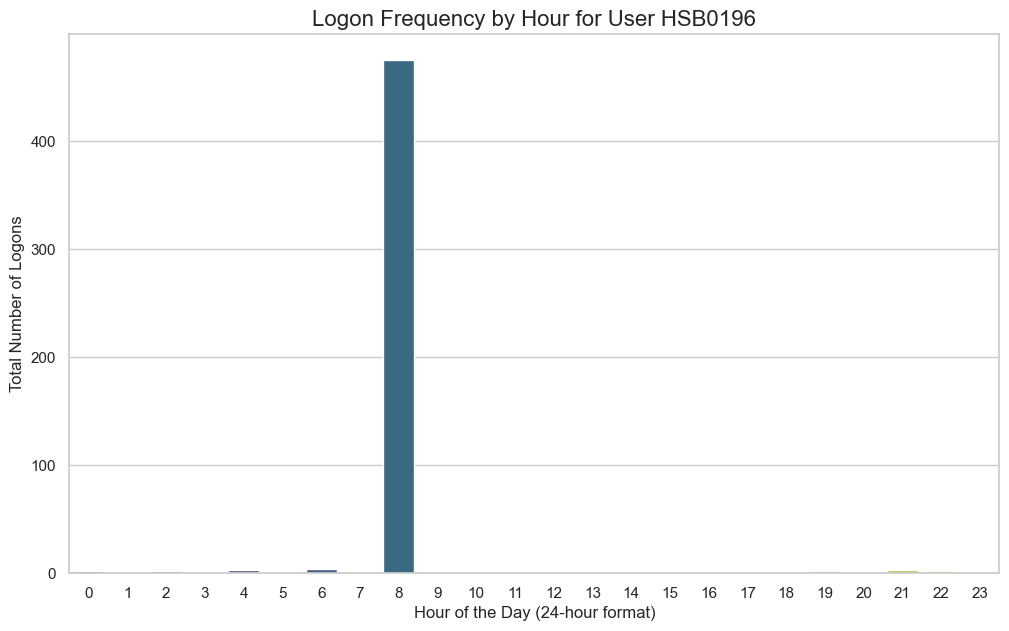

In [10]:
# --- Visualize the Suspect's Logon Behavior ---

# We already have the 'suspect_logons' dataframe. Let's filter for 'Logon' events.
user_logons_only = suspect_logons[suspect_logons['activity'] == 'Logon'].copy()

# Extract the hour from the date column
user_logons_only['hour'] = user_logons_only['date'].dt.hour

# --- Create the Bar Plot ---
plt.figure(figsize=(12, 7))
sns.countplot(x='hour', data=user_logons_only, palette='viridis', order=range(24))

# Add titles and labels
plt.title(f'Logon Frequency by Hour for User {suspect_user_id}', fontsize=16)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Total Number of Logons', fontsize=12)
plt.xticks(range(24)) # Ensure all 24 hours are shown on the x-axis

# Display the plot
plt.show()

--- STARTING NEW INVESTIGATION FOR USER: AJF0370 ---

--- Statistical Profile for AJF0370 ---
Average daily file copies: 22.19
Standard deviation: 14.40

--- High-Risk Anomalous Days Found ---
No days found above the Z-score threshold of 3.0


C:\Users\sohan\AppData\Local\Temp\ipykernel_28052\3362211541.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=new_logons_only, palette='plasma', order=range(24))


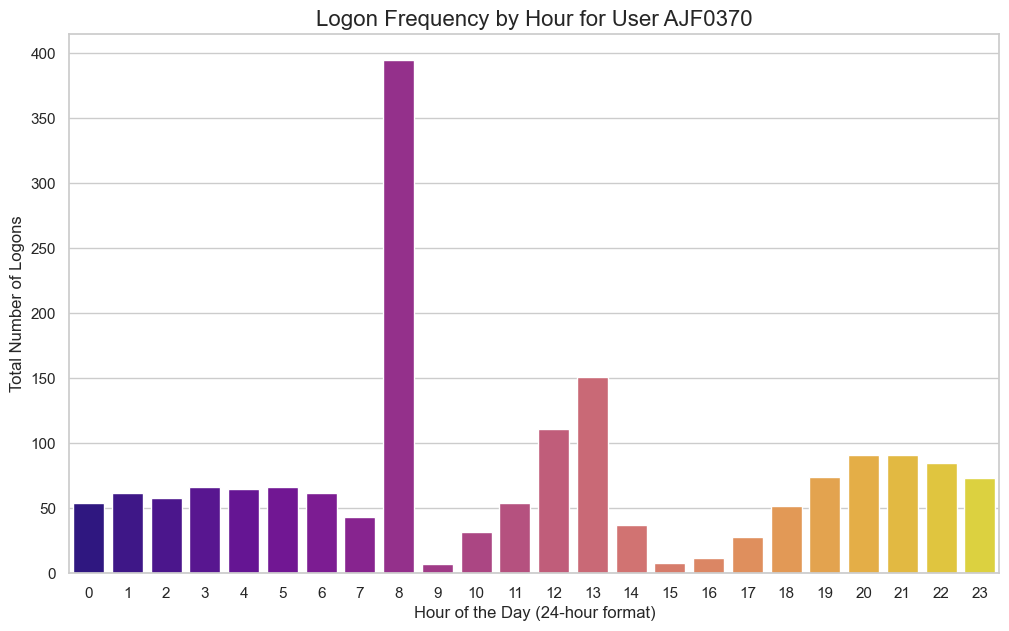

In [11]:
# ===================================================================
# ==                 INVESTIGATIVE WORKFLOW RE-RUN                 ==
# ===================================================================

# --- Define our NEW user of interest ---
new_suspect_id = 'AJF0370'
print(f"--- STARTING NEW INVESTIGATION FOR USER: {new_suspect_id} ---")

# --- 1. Isolate Data for the new suspect ---
new_suspect_files = file_df[file_df['user'] == new_suspect_id].copy()
new_suspect_logons = logon_df[logon_df['user'] == new_suspect_id].copy()

# --- 2. Aggregate their file activity by day ---
new_suspect_files.set_index('date', inplace=True)
new_daily_counts = new_suspect_files['id'].resample('D').count().fillna(0)

# --- 3. Run the Z-Score Model ---
new_mean = new_daily_counts.mean()
new_std = new_daily_counts.std()
new_z_scores = (new_daily_counts - new_mean) / new_std
new_anomalies = new_z_scores[new_z_scores > 3.0]

print(f"\n--- Statistical Profile for {new_suspect_id} ---")
print(f"Average daily file copies: {new_mean:.2f}")
print(f"Standard deviation: {new_std:.2f}")

print("\n--- High-Risk Anomalous Days Found ---")
if new_anomalies.empty:
    print("No days found above the Z-score threshold of 3.0")
else:
    print(new_anomalies)

# --- 4. Visualize their Logon Hours ---
new_logons_only = new_suspect_logons[new_suspect_logons['activity'] == 'Logon'].copy()
new_logons_only['hour'] = new_logons_only['date'].dt.hour

plt.figure(figsize=(12, 7))
sns.countplot(x='hour', data=new_logons_only, palette='plasma', order=range(24))
plt.title(f'Logon Frequency by Hour for User {new_suspect_id}', fontsize=16)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Total Number of Logons', fontsize=12)
plt.xticks(range(24))
plt.show()

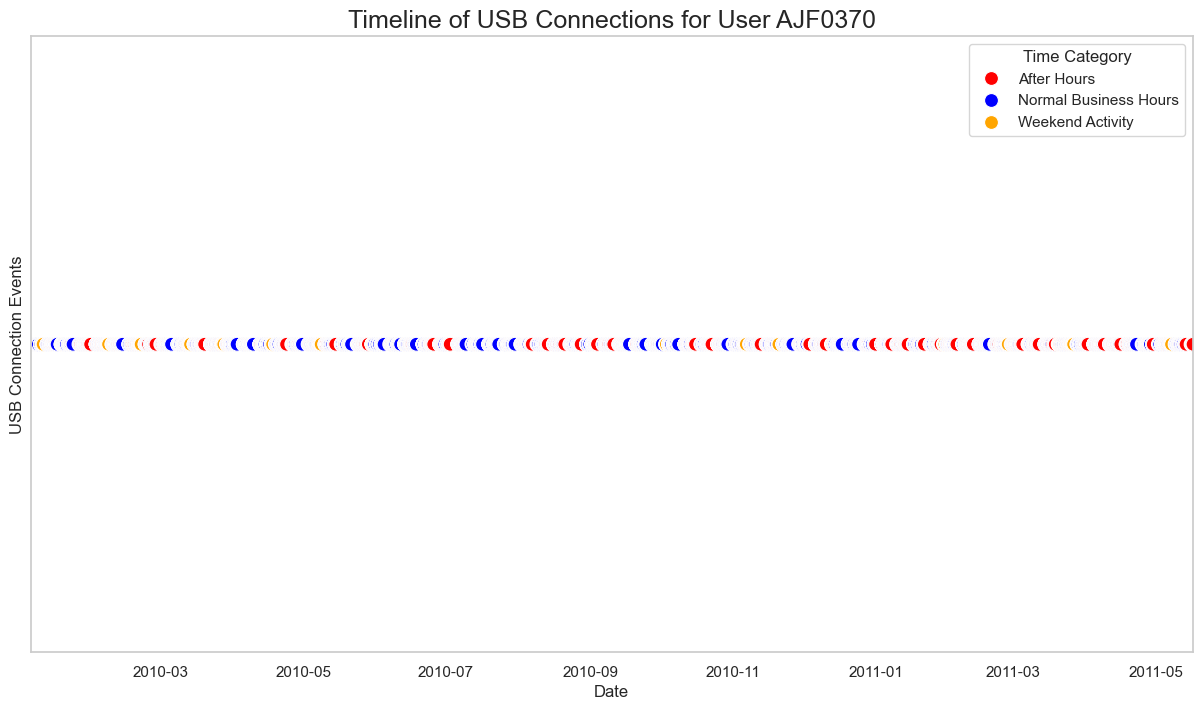

In [13]:
# --- Create the Final "Smoking Gun" Visualization (Corrected) ---

# Define our suspect ID again to be safe
new_suspect_id = 'AJF0370'

# --- THIS IS THE MISSING LINE ---
# We need to isolate the device connection data for our new suspect
new_suspect_devices = device_df[device_df['user'] == new_suspect_id].copy()


# Let's focus only on 'Connect' events
usb_connections = new_suspect_devices[new_suspect_devices['activity'] == 'Connect'].copy()

# --- Define a function to classify if an event is "After Hours" ---
# Based on our heatmap, we'll define 'normal hours' as 7 AM to 6 PM (18:00)
def is_after_hours(dt):
    if dt.weekday() >= 5: # Saturday (5) or Sunday (6)
        return 'Weekend Activity'
    if dt.hour < 7 or dt.hour > 18:
        return 'After Hours'
    else:
        return 'Normal Business Hours'

# Apply this function to every connection event
usb_connections['time_category'] = usb_connections['date'].apply(is_after_hours)


# --- Create the Timeline Plot ---
plt.figure(figsize=(15, 8))
sns.scatterplot(
    x='date',
    y=[1] * len(usb_connections),
    hue='time_category',
    data=usb_connections,
    s=100,
    palette={'Normal Business Hours': 'blue', 'After Hours': 'red', 'Weekend Activity': 'orange'}
)

plt.yticks([])
plt.ylabel('USB Connection Events', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title(f'Timeline of USB Connections for User {new_suspect_id}', fontsize=18)
plt.legend(title='Time Category')
plt.grid(axis='x')
plt.xlim(usb_connections['date'].min(), usb_connections['date'].max())

plt.show()

In [15]:
# --- Exporting Data for Power BI (Corrected) ---

# --- THIS IS THE FIX ---
# We need to set the main file_df's index to be the 'date' column first.
# We will do this on a copy to avoid modifying our original dataframe.
powerbi_file_df = file_df.set_index('date')


# --- Now the rest of the code will work ---
# First, let's get the daily file counts for our two main suspects
hsb_daily_counts = powerbi_file_df[powerbi_file_df['user'] == 'HSB0196']['id'].resample('D').count().fillna(0).reset_index()
ajf_daily_counts = powerbi_file_df[powerbi_file_df['user'] == 'AJF0370']['id'].resample('D').count().fillna(0).reset_index()

# Rename the columns to be more friendly for Power BI
hsb_daily_counts.columns = ['date', 'file_copies']
ajf_daily_counts.columns = ['date', 'file_copies']

# Also, let's re-create the USB connection data for our main suspect
ajf_usb_connections = device_df[(device_df['user'] == 'AJF0370') & (device_df['activity'] == 'Connect')].copy()

def is_after_hours(dt):
    if dt.weekday() >= 5: return 'Weekend Activity'
    if dt.hour < 7 or dt.hour > 18: return 'After Hours'
    else: return 'Normal Business Hours'

ajf_usb_connections['time_category'] = ajf_usb_connections['date'].apply(is_after_hours)


# --- Save the files to a new 'processed_data' folder ---
import os
output_dir = 'processed_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

hsb_daily_counts.to_csv(f'{output_dir}/hsb0196_daily_files.csv', index=False)
ajf_daily_counts.to_csv(f'{output_dir}/ajf0370_daily_files.csv', index=False)
ajf_usb_connections.to_csv(f'{output_dir}/ajf0370_usb_connections.csv', index=False)

print("Data for Power BI has been successfully exported to the 'processed_data' folder!")

Data for Power BI has been successfully exported to the 'processed_data' folder!


In [16]:
# ===================================================================
# ==            SCALABLE RISK-SCORING ENGINE (FOR ALL USERS)       ==
# ===================================================================
print("Starting risk-scoring for all users...")

# --- 1. Calculate Total File Copies for Every User ---
file_counts_by_user = file_df.groupby('user')['id'].count()

# --- 2. Calculate After-Hours and Weekend Logons for Every User ---
logons_only_df = logon_df[logon_df['activity'] == 'Logon'].copy()

# Create boolean flags for suspicious time periods
logons_only_df['is_after_hours'] = (logons_only_df['date'].dt.hour < 7) | (logons_only_df['date'].dt.hour > 18)
logons_only_df['is_weekend'] = logons_only_df['date'].dt.weekday >= 5 # 5=Saturday, 6=Sunday

# Group by user and sum the flags (True=1, False=0)
suspicious_logons_by_user = logons_only_df.groupby('user')[['is_after_hours', 'is_weekend']].sum()

# --- 3. Combine All Metrics into a Single User Profile DataFrame ---
# Start with the logon data
risk_df = suspicious_logons_by_user
# Join the file copy data
risk_df = risk_df.join(file_counts_by_user.rename('total_file_copies'), how='outer')
# Fill any missing values with 0 (e.g., users who logged on but never copied files)
risk_df.fillna(0, inplace=True)

# --- 4. Calculate a Normalized Risk Score ---
# We use Z-scores to normalize each metric, so one doesn't dominate the others
risk_df['files_z'] = (risk_df['total_file_copies'] - risk_df['total_file_copies'].mean()) / risk_df['total_file_copies'].std()
risk_df['after_hours_z'] = (risk_df['is_after_hours'] - risk_df['is_after_hours'].mean()) / risk_df['is_after_hours'].std()
risk_df['weekend_z'] = (risk_df['is_weekend'] - risk_df['is_weekend'].mean()) / risk_df['is_weekend'].std()

# The final risk score is the sum of these normalized scores
risk_df['risk_score'] = risk_df['files_z'] + risk_df['after_hours_z'] + risk_df['weekend_z']

# --- 5. Export the Final, Comprehensive Data for Power BI ---
# Sort by the highest risk score to see our top suspects
risk_df = risk_df.sort_values(by='risk_score', ascending=False)

# Save to our processed_data folder
risk_df.reset_index().to_csv('processed_data/all_user_risk_scores.csv', index=False)


print("\n--- Top 10 Most Suspicious Users (by calculated Risk Score) ---")
display(risk_df.head(10))

print("\nRisk scoring complete. 'all_user_risk_scores.csv' is ready for Power BI.")

Starting risk-scoring for all users...

--- Top 10 Most Suspicious Users (by calculated Risk Score) ---


,is_after_hours,is_weekend,total_file_copies,files_z,after_hours_z,weekend_z,risk_score
user,,,,,,,
AJF0370,847,77,11053.0,7.255705,6.045975,1.498455,14.800135
WPR0368,950,325,0.0,-0.304787,6.809806,7.203698,13.708717
DLM0051,213,182,10673.0,6.995777,1.344335,3.913981,12.254094
LBH0942,0,199,10889.0,7.143526,-0.235238,4.305067,11.213355
HSB0196,18,123,11627.0,7.648334,-0.101753,2.556685,10.103267
BSS0369,491,180,2295.0,1.265043,3.405937,3.867971,8.538951
HPH0075,0,105,9323.0,6.072348,-0.235238,2.142595,7.979705
MPM0220,530,1,6689.0,4.270634,3.695155,-0.249926,7.715863
EIS0041,789,0,3676.0,2.209677,5.615856,-0.272932,7.552601



Risk scoring complete. 'all_user_risk_scores.csv' is ready for Power BI.
